<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Tarra !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Tarra ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Tarra dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

## Inisialisasi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from IPython.display import display, Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Memuat Data

*Dataset* yang Anda perlukan disimpan di folder `/datasets/faces/`. Pada folder tersebut, Anda bisa menemukan: 
- Folder `final_files` dengan 7,6 ribu foto
- *File* `labels.csv` yang memuat label, dengan dua kolom: `file_name` dan `real_age`

Mengingat jumlah *file* gambar cukup banyak, Anda disarankan untuk tidak membacanya sekaligus, karena hal ini hanya akan menghabiskan sumber daya komputasi. Kami sarankan Anda untuk membuat generator dengan ImageDataGenerator. Metode ini telah dijelaskan sebelumnya di Bab 3, Pelajaran ke-7 dari sprint ini.

*File* label bisa dimuat sebagai *file* CSV biasa.

In [2]:
# Memuat Data
labels = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
# Tampilkan data
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [4]:
# Memeriksa apa ada data terduplikat
labels.duplicated().sum()

0

In [5]:
# Cek Missing Values
labels.isnull().sum()

file_name    0
real_age     0
dtype: int64

In [6]:
# Ukuran dataset
print("Jumlah total data:", len(labels))

Jumlah total data: 7591


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## EDA

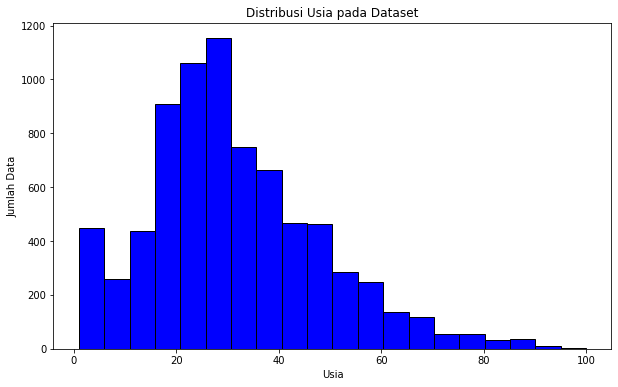

In [7]:
# Distribusi usia
plt.figure(figsize=(10, 6))
plt.hist(labels['real_age'], bins=20, color='blue', edgecolor='black')
plt.title('Distribusi Usia pada Dataset')
plt.xlabel('Usia')
plt.ylabel('Jumlah Data')
plt.show()

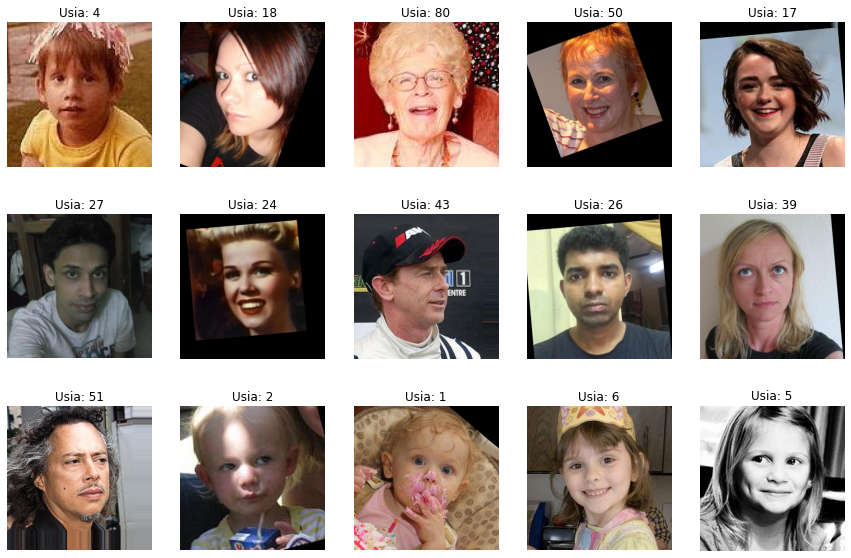

In [8]:
# Menampilkan 10-15 foto untuk usia yang berbeda
unique_ages = labels['real_age'].unique()[:15]  # Mengambil 10-15 usia unik pertama
plt.figure(figsize=(15, 10))

for i, age in enumerate(unique_ages):
    plt.subplot(3, 5, i+1)
    sample_image = labels[labels['real_age'] == age]['file_name'].iloc[0]
    img = plt.imread('/datasets/faces/final_files/' + sample_image)
    plt.imshow(img)
    plt.title(f'Usia: {age}')
    plt.axis('off')

plt.show()

### Temuan

1. Ukuran Dataset:
    - Dataset terdiri dari 7,591 gambar.
2. Distribusi Usia:
    - Distribusi usia menunjukkan bahwa jumlah gambar terbanyak berada di rentang usia 20-40 tahun.
    - Puncak distribusi berada di sekitar usia 30 tahun.


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Pemodelan 

Definisikan fungsi-fungsi yang diperlukan untuk melatih model Anda pada platform GPU dan buat satu skrip yang berisi semua fungsi tersebut beserta bagian inisialisasi. 

Untuk mempermudah tugas ini, Anda dapat mendefinisikannya dalam *notebook* ini dan menjalankan kode siap pakai di bagian berikutnya untuk menyusun skrip secara otomatis.

Definisi di bawah ini juga akan diperiksa oleh *project reviewer* agar mereka dapat memahami cara Anda membangun model.

In [9]:
# Fungsi Load Train
def load_train(labels='/datasets/faces/labels.csv', images='/datasets/faces/final_files/'):
    
    """
    Kode ini memuat bagian training set dari file path
    """
    # Membuat objek ImageDataGenerator untuk augmentasi data
    train_datagen = ImageDataGenerator(rescale=1./255.,
                                       horizontal_flip=True,
                                       vertical_flip=True)
    # Membuat generator untuk data training
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=data,
        directory=images,
        x_col='file_name', # Nama kolom yang berisi nama file gambar
        y_col='real_age', # Nama kolom yang berisi label (umur)
        target_size=(150, 150),
        batch_size=32,
        class_mode='raw',  # 'raw' karena umur adalah nilai numerik
        seed=123
    )


    return train_gen_flow

In [10]:
# Fungsi Load Test
def load_test(labels='/datasets/faces/labels.csv', images='/datasets/faces/final_files/',):
    
    """
    Kode ini memuat bagian validation set/test set dari file path
    """
    # Membuat objek ImageDataGenerator tanpa augmentasi data untuk test
    test_datagen = ImageDataGenerator(rescale=1./255.)
    # Membuat generator untuk data test
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=data,
        directory=images,
        x_col='file_name',
        y_col='real_age',
        target_size=(150,150),
        batch_size=32,
        class_mode='raw',
        seed=123
    )
    return test_gen_flow

In [11]:
# Fungsi Create Model
def create_model(input_shape=(150, 150, 3), num_classes=1):
    
    """
    Kode ini mendefinisikan model
    """
    # Inisialisasi ResNet50 sebagai backbone
    base_model = ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )
    # Model Sequential
    model = Sequential()
    # Tambahkan base_model ResNet50 ke model
    model.add(base_model)
    # Tambahkan lapisan GlobalAveragePooling2D ke model
    model.add(GlobalAveragePooling2D())
    # Tambahkan lapisan Dense dengan jumlah kelas (num_classes) dan fungsi aktivasi linear
    model.add(Dense(num_classes, activation='linear'))
    # Compile model dengan optimizer Adam, loss categorical_crossentropy, dan metrik akurasi
    model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

    return model

In [12]:
# Fungsi Train Model
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
    """
    Melatih model dengan parameter yang diberikan
    """
    if batch_size is None:
        batch_size = 32

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)

    if validation_steps is None:
        validation_steps = len(test_data)
        
    model.fit_generator(
        train_data,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_data=test_data,
        validation_steps=validation_steps,
        verbose=1
    )

    return model

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Menyiapkan Skrip untuk Dijalankan pada Platform GPU

Setelah Anda mendefinisikan fungsi-fungsi yang diperlukan, Anda dapat membuat skrip untuk platform GPU, mengunduhnya melalui menu "File|Open...", dan mengunggahnya nanti untuk dijalankan pada platform GPU.

Catatan: Skrip Anda juga harus menyertakan bagian inisialisasi. Contohnya ditunjukkan di bawah ini.

In [13]:
# siapkan skrip untuk dijalankan pada platform GPU

init_str = """
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamimport inspect
import inspect
"""
# Simpan skrip ke dalam file
with open('run_modelsprint15_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

NameError: name 'inspect' is not defined

In [14]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import inspect

# Fungsi Load Train
def load_train(labels='/datasets/faces/labels.csv', images='/datasets/faces/final_files/'):
  
    # Membuat objek ImageDataGenerator untuk augmentasi data
    train_datagen = ImageDataGenerator(rescale=1./255.,
                                       horizontal_flip=True,
                                       vertical_flip=True)
    # Membuat generator untuk data training
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=data,
        directory=images,
        x_col='file_name', 
        y_col='real_age', 
        target_size=(150, 150),
        batch_size=32,
        class_mode='raw', 
        seed=123
    )

    return train_gen_flow


# Fungsi Load Test
def load_test(labels='/datasets/faces/labels.csv', images='/datasets/faces/final_files/',):
    
    # Membuat objek ImageDataGenerator tanpa augmentasi data untuk test
    test_datagen = ImageDataGenerator(rescale=1./255.)

    # Membuat generator untuk data test
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=data,
        directory=images,
        x_col='file_name',
        y_col='real_age',
        target_size=(150,150),
        batch_size=32,
        class_mode='raw',
        seed=123
    )
    return test_gen_flow


# Fungsi Create Model
def create_model(input_shape=(150, 150, 3), num_classes=1):
    
    # Inisialisasi ResNet50 sebagai backbone
    base_model = ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )
    # Model Sequential
    model = Sequential()

    # Tambahkan base_model ResNet50 ke model
    model.add(base_model)

    # Tambahkan lapisan GlobalAveragePooling2D ke model
    model.add(GlobalAveragePooling2D())

    # Tambahkan lapisan Dense dengan jumlah kelas (num_classes) dan fungsi aktivasi linear
    model.add(Dense(num_classes, activation='linear'))

    # Compile model dengan optimizer Adam, loss categorical_crossentropy, dan metrik akurasi
    model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

    return model

# Fungsi Train Model
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
    if batch_size is None:
        batch_size = 32

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)

    if validation_steps is None:
        validation_steps = len(test_data)
        
    model.fit_generator(
        train_data,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_data=test_data,
        validation_steps=validation_steps,
        verbose=1
    )

    return model

### *Output*

Letakkan *output* dari platform GPU sebagai sel *Markdown* di sini.

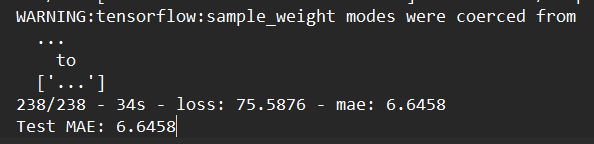

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Kesimpulan

Dengan parameter yang dikerjakan seperti diatas sudah dapat membuat model bekerja dengan baik. 

# Daftar Periksa

- [ ]  *Notebook* dibuka 
- [ ]  Tidak ada kesalahan dalam kode 
- [ ]  Sel dengan kode telah disusun berdasarkan urutan eksekusi 
- [ ]  Analisis data eksploratif telah dijalankan 
- [ ]  Hasil dari analisis data eksploratif ditampilkan pada *notebook* final 
- [ ]  Skor MAE model tidak lebih tinggi dari 8 "
- [ ]  Kode pelatihan model telah disalin ke *notebook* final 
- [ ]  *Output* pelatihan model telah disalin di *notebook* final 
- [ ]  Temuan telah diberikan berdasarkan hasil pelatihan model 